In [1]:
# Load a molecule into the OpenFF Molecule object
# from rdkit import Chem
# from rdkit.Chem import AllChem
# mol = Chem.MolFromMolFile('example.mol')
# mol = Chem.AddHs(mol)
# AllChem.EmbedMolecule(mol)
# Chem.MolToMolFile(mol, "rdkit.mol")

from openff.toolkit.topology import Molecule
molecule = Molecule.from_file('smiles.smi.sdf')
# molecule.generate_conformers(n_conformers=1, clear_existing=True)

# Create an OpenFF Topology object from the molecule
from openff.toolkit.topology import Topology
topology = Topology.from_molecules(molecule)

# Load the latest OpenFF force field release: version 2.0.0, codename "Sage"
from openff.toolkit.typing.engines.smirnoff import ForceField
forcefield = ForceField('openff-2.0.0.offxml')

# Create an OpenMM system representing the molecule with SMIRNOFF-applied parameters
openmm_system = forcefield.create_openmm_system(topology)

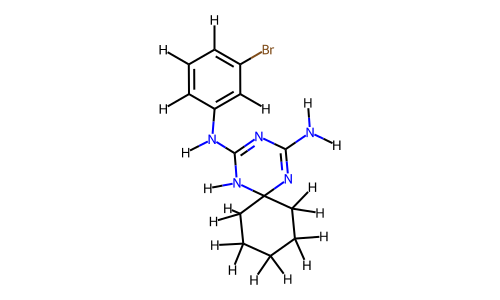

In [2]:
molecule

In [6]:
import parmed

omm_top = topology.to_openmm()
chain = list(omm_top.chains())[0]
res = list(chain.residues())[0]
res.name = "LIG"

# Convert OpenMM System to a ParmEd structure.
parmed_structure = parmed.openmm.load_topology(
    omm_top, openmm_system, molecule.conformers[0]
)

In [7]:
# Export GROMACS files.
parmed_structure.save("system.top", overwrite=True)
parmed_structure.save("system.pdb", overwrite=True)

In [ ]:
# Export AMBER files.
parmed_structure.save("system.prmtop", overwrite=True)
parmed_structure.save("system.inpcrd", overwrite=True)

# Error converting via parmed to prmtop, related to ParmEd #930 #603
# https://github.com/openforcefield/openff-toolkit/issues/603